In [ ]:
import numpy as np
from dgamod import *
import cmath as cm
import matplotlib as mpl
import matplotlib.pyplot as plt
from numpy import random
import pandas as pd
import configparser
import sys
import os

mpl.rcParams.update({'font.size': 12})
plt.rcParams['axes.axisbelow'] = True
%matplotlib widget
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linewidth'] = 2
#mpl.rcParams['axes.prop_cycle'] = cycler(color='bgrkmyc')

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["b", "g", "r", 'k','y' , 'm','tab:orange', 'tab:cyan', 'tab:brown', 'slategrey', 'deeppink' ]) 

In [ ]:
def state_fidelity(state):
    nh = np.shape(state)[0]
    fid = np.real(state[nh-1]*np.conjugate(state[nh-1]))
    return fid


In [ ]:
def compare_evolutions(directory,n,samples):

    samples = list(samples)
    
    axs = plt.figure(figsize=(11,5)) # generate figure

    files = os.listdir(directory)
    for file in files:
        if 'n' and '.ini' in file:
            initfile = directory + '/'+file
            config = configparser.ConfigParser()
            config.read(initfile)
            print(initfile)

    # system parameters
    nh = config.getint("system_parameters", "n")
    dt = config.getfloat("system_parameters", "dt")
    b = config.getfloat("system_parameters", "b")
    t_steps = config.getint("ga_initialization", "num_genes")+1

    # generar propagadores
    actions = actions_paper2(b, nh)
    propagators = gen_props(actions, nh, b, dt)
    times = np.arange(0,t_steps,1)

    # definicion del estado inicial e inicializacion de estados forzado y natural

    initial_state = np.zeros(nh, dtype=np.complex_)
    initial_state[0] = 1.0

    free_state = initial_state

    for sample in samples:

        # acceder a la solucion
        solution_file = directory + "/act_sequence_n{}_sample{}.dat".format(nh,sample)
        action_sequence = np.genfromtxt(solution_file, dtype=int)

        # inicializacion de estado forzado 
        forced_state = initial_state
    
        # almacenar evolucion natural y evolucion forzada
        forced_evol = [state_fidelity(forced_state)]

        for action in action_sequence:
            
            forced_state = calculate_next_state(forced_state,action,propagators)
            forced_evol.append(state_fidelity(forced_state))

        max_forced = np.max(forced_evol)

        plt.plot(times,forced_evol,'-o', label = 'Forced Evolution. Sample {} , Máx.: {}'.format(sample,max_forced))
    
    natural_evol = [state_fidelity(free_state)]
    
    for action in action_sequence:
            
        free_state = calculate_next_state(free_state,0,propagators)
        natural_evol.append(state_fidelity(free_state))

    max_natural = np.max(natural_evol)

    plt.plot(times,natural_evol, '-v', label = 'Natural Evolution , Máx: {}'.format(max_natural))
    plt.legend(loc='upper left')

    plt.title(' Probabilidad de transmisión ')

# Comparación de evolución natural y evolución con forzamientos.

## N = 12

/home/speron/dynga/dinamic_ga/n10_si/gan10_si.ini


Propagacion de autoestados: correcta
[15  9  9 14 13 12 14 15 14  0  0  9  8  8 11 14 15 11  2  9 15  9  2  5
  0  3  7  0  7  2  0  6  5  1  5  0  6 11 10  4  7 14  4  4  7  9  1 11
  1 14]
[10  0  4  9  8 10  0 13 15  0 13 14  1  0  8  1 10  8  0 12  3 11  3  6
  6  2 15  0 11  1  5 15  2  2  2 15  2  6  3  4  4  1  5  8  8  7  4 11
  8  9]
[ 3 11 13  8  9 14 14 14 11 12  0  8  0  1  8  8  1 10 11 15  1 15  2  6
 11  0  0 11  1 15  6  7  0  4  3 15  5  1  5 11 10  0 13 15  6  7  4  3
  9  1]


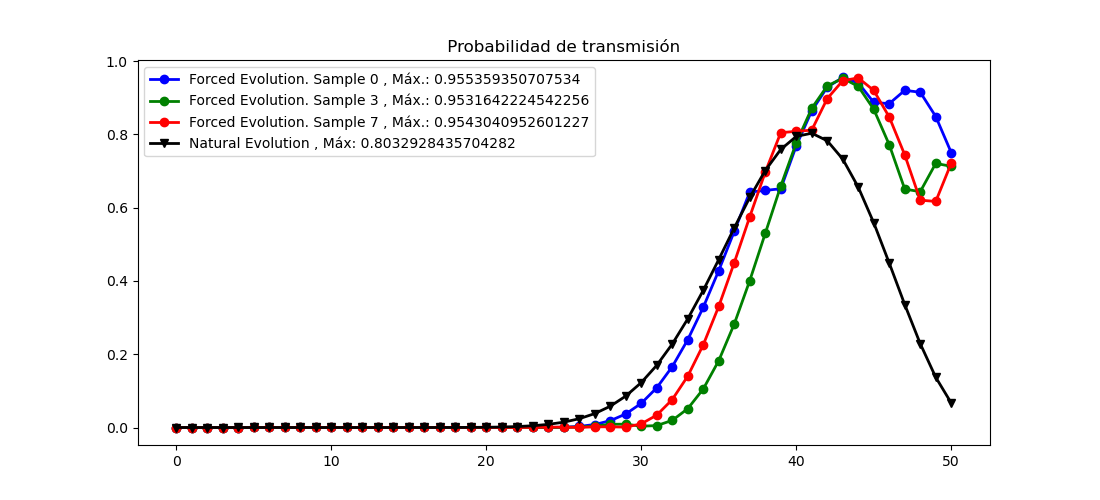

In [ ]:
directory = '/home/speron/dynga/dinamic_ga/n12_si'
n = 12
samples = np.arange(0,10,1)
compare_evolutions(directory,n,[0,3,7])

## N = 13

/home/speron/dynga/dinamic_ga/n13_si/gan13_si.ini
Propagacion de autoestados: correcta
[11 11 15  0  8  9 14 11 12 11 10 11 11 14  1  9 13  0 13 13 11 11 13  3
  5  9  1  0  0 14  1  1 11 11 15  0  5  6  4 11 11  6 15 11 11 11  2 15
  2  0 13 13  6  8 15  0  2  9 14  0 11  8  2  9 14]


OSError: /home/speron/dynga/dinamic_ga/n13_si/act_sequence_n13_sample1.dat not found.

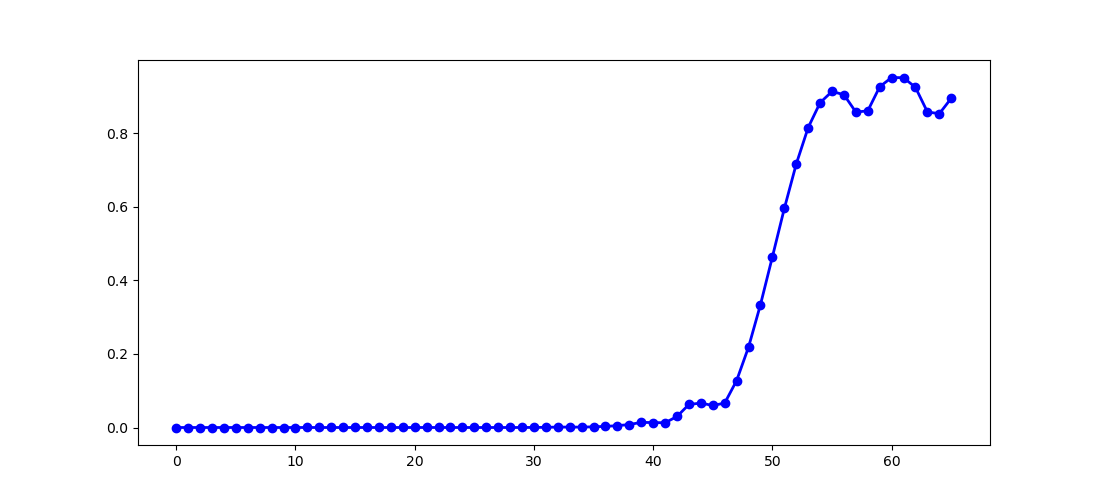

In [ ]:
directory = '/home/speron/dynga/dinamic_ga/n13_si'
n = 13
samples = np.arange(0,10,1)
compare_evolutions(directory,n,samples)

## N = 15

/home/speron/dynga/dinamic_ga/n13_og/gan13_og.ini
Propagacion de autoestados: correcta
[13 10 10  0 15 11 10 11 12 14  9 14  8 13  1  8  8 12  3  3  3 15  1  7
  4  2  6  3 14 11  0  1 15  2  9  7  7  0 11 11  3  4  1  7  1  5  1  7
 15  1  5  2  7  4  1  3  4  1 14  2  7  6  5  9  6]
[ 3 10  9  9 14 10 15  8 12 10  9 11 11  1  1  1 12 13  2  1  3  1  3  7
  9 15  6 14  2  8 14 11 13  9 13  7  4 11 15 11  0  0  7  6  2 15  5  6
 15  0 15  6  0  2  3  9  0 15  1  8  9  8  3 11  2]
[ 9  0  7  9  8 10  0 15 12 11 15 15 12  8  1  1  9  3  2 13 13 15  0  9
  6  1 15 12  2  8  4  7 13  5  9 11  5 11  5 11  2  7  1  0  0  5  6  4
  6  3  3  4  5  1  6 13 14  8  7  5  3 14  2 10  1]
[ 1  2  2  9 15 13 13 15  9 12  0  9 13 14 13 10  1  1 11  1  3  3  2  2
  9  1 13  7 15  1  0 14 15  2  3  4 13  0 11  3  7 11  4  1 15  3  3  6
  7  7  5  4  1  6 15  6 14  3 13 13  4 14 12  1 10]
[15 10  8 12 11 15  8 12 11 10 15 11  9  1  1  1  1  8  2  3  3  3  3  7
  4 15  7  3  1 10  1  1 15 15 13 13  0 11  

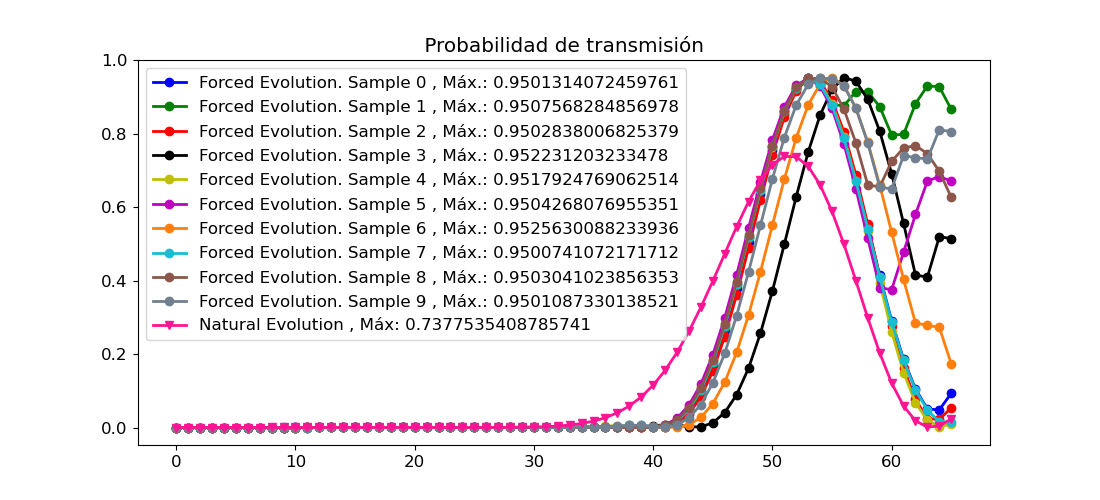

In [ ]:
directory = '/home/speron/dynga/dinamic_ga/n15_si'
n = 15
samples = [3,4,8] #np.arange(0,10,1)
compare_evolutions(directory,n,samples)

In [ ]:
b = 100
n = 6
dt = 0.15
# generar propagadores
actions = actions_paper(b, n)
propagators = gen_props(actions, n, b, dt)


n6_files = os.listdir('/home/speron/dynga/dinamic_ga/n6_statistics/')

ga_actions = np.asarray([])

number_of_sequences = 0

for file in n6_files:
    if 'act_sequence' in file:
        actions = np.genfromtxt('/home/speron/dynga/dinamic_ga/n6_statistics/' + file, dtype=int)
        ga_actions = np.append(ga_actions,actions)
        number_of_sequences += 1

np.shape(ga_actions)

Propagacion de autoestados: correcta


(30000,)

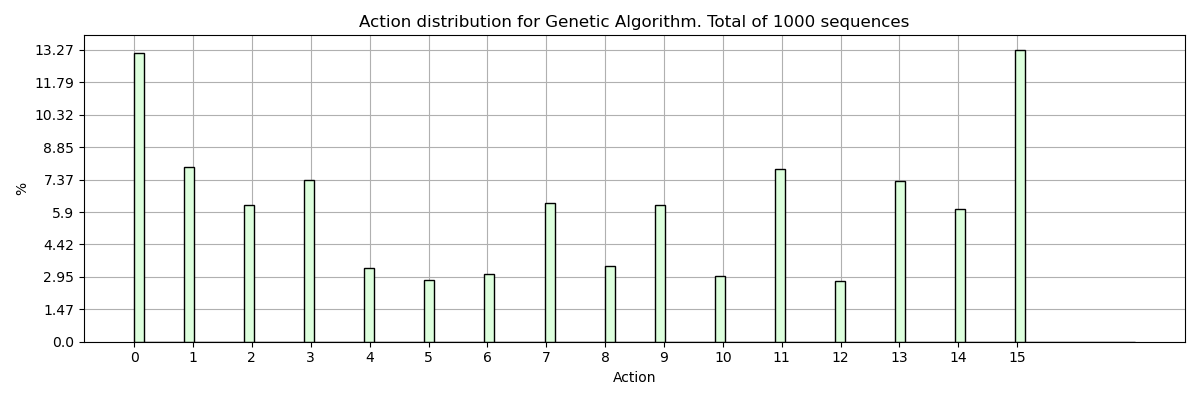

In [ ]:
population = ga_actions
nbins  =100
# --------------------------------------------------
# array of action distributions
#---------------------------------------------------
figure, ax = plt.subplots(figsize=(12, 4))


# plot histogram of fidelity distribution
hist, bins, c = ax.hist(
    population, bins=nbins, range=[0, 17], edgecolor="black", color="#DDFFDD"
)

# configure yticks to show percentage of total pop. number
max_value = int(np.max(hist))
y = np.linspace(int(0), max_value, 10, dtype=int)
ax.set_yticks(y)
y_ticks = np.around(y* 100 / np.shape(population),2)
ax.set_yticklabels(y_ticks)

x = np.arange(0, 16, 1)
ax.set_xticks(x)

# set grid, title and labels
plt.grid()
plt.title("Action distribution for Genetic Algorithm. Total of {} sequences".format(number_of_sequences))
ax.set_xlabel("Action")
ax.set_ylabel("%")
plt.tight_layout()

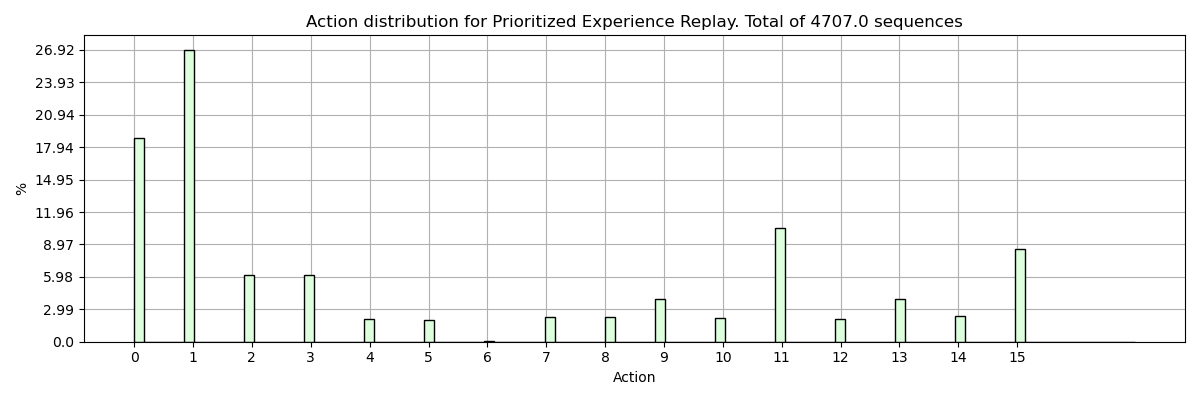

In [ ]:
population = np.genfromtxt('/home/speron/dynga/dinamic_ga/n6_statistics/success_action_sequences_PER.dat')
population = population.flatten()
nbins  =100
# --------------------------------------------------
# array of action distributions
#---------------------------------------------------
figure, ax = plt.subplots(figsize=(12, 4))


# plot histogram of fidelity distribution
hist, bins, c = ax.hist(
    population, bins=nbins, range=[0, 17], edgecolor="black", color="#DDFFDD"
)

# configure yticks to show percentage of total pop. number
max_value = int(np.max(hist))
y = np.linspace(int(0), max_value, 10, dtype=int)
ax.set_yticks(y)
y_ticks = np.around(y* 100 / np.shape(population),2)
ax.set_yticklabels(y_ticks)

x = np.arange(0, 16, 1)
ax.set_xticks(x)

# set grid, title and labels
plt.grid()
plt.title("Action distribution for Prioritized Experience Replay. Total of {} sequences".format(population.shape[0]/28))
ax.set_xlabel("Action")
ax.set_ylabel("%")
plt.tight_layout()

Propagacion de autoestados: correcta


Text(0.5, 1.0, ' Probabilidad de transmisión ')

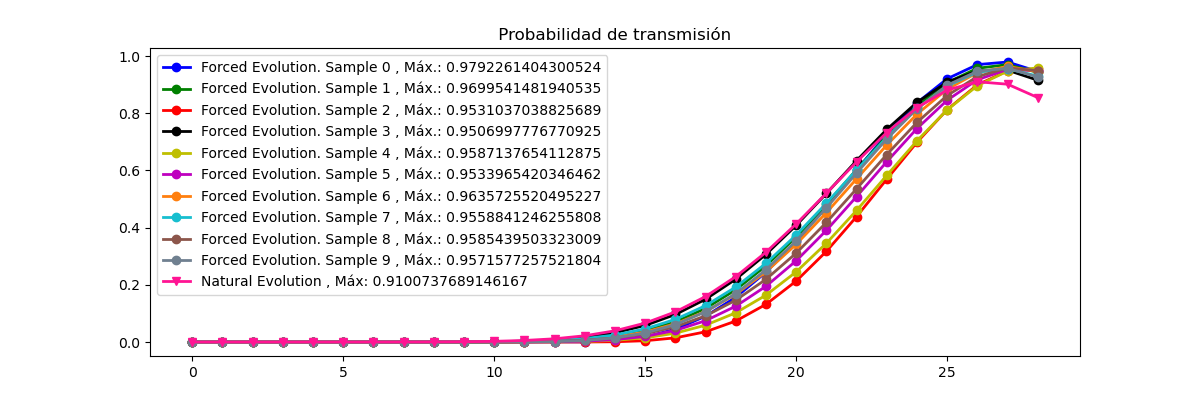

In [ ]:
figure, ax = plt.subplots(figsize=(12, 4))

# system parameters
nh = 6
dt = 0.15
b = 100
t_steps = 29

# generar propagadores
actions = actions_paper2(b, nh)
propagators = gen_props(actions, nh, b, dt)
times = np.arange(0,t_steps,1)

# definicion del estado inicial e inicializacion de estados forzado y natural

initial_state = np.zeros(nh, dtype=np.complex_)
initial_state[0] = 1.0

free_state = initial_state

population = np.genfromtxt('/home/speron/dynga/dinamic_ga/n6_statistics/success_action_sequences_PER.dat',dtype=int)

for i in np.arange(0,10,1):

    action_sequence = population[i,:]
    forced_state = initial_state
    forced_evol = [state_fidelity(forced_state)]


    for action in action_sequence:
        
        forced_state = calculate_next_state(forced_state,action,propagators)
        forced_evol.append(state_fidelity(forced_state))

    max_forced = np.max(forced_evol)

    plt.plot(times,forced_evol,'-o', label = 'Forced Evolution. Sample {} , Máx.: {}'.format(i,max_forced))

natural_evol = [state_fidelity(free_state)]

for action in action_sequence:
        
    free_state = calculate_next_state(free_state,0,propagators)
    natural_evol.append(state_fidelity(free_state))

max_natural = np.max(natural_evol)

plt.plot(times,natural_evol, '-v', label = 'Natural Evolution , Máx: {}'.format(max_natural))
plt.legend(loc='upper left')

plt.title(' Probabilidad de transmisión ')

/home/speron/dynga/dinamic_ga/n6_si/gan6_si.ini
Propagacion de autoestados: correcta
[11 12 15 15  8  0 15 13  0 11 15  0  1  1 15  1  2  0  2  2  3  3  4  5
  3  5 14 11  2  2]
[12  3 11 13 10 11 14  0 10  0 11 13  9  0  1  3  3  0  1 15  1  4 14  2
 15  5  4  5  7 14]
[13 10 11 11 10  9 13 11  9 13 15  9  0 13  0  1 11  2  3  5  5  5  0  4
  5  2  1  5  2  2]
[10 13  9  7 10 11 15 14 15  0  0 13 13 13 13  3  0  2 15  1 15  7  0  5
 14 15  2  3 13 13]
[ 2 13  8  7 15 11  8  9 14 14 10 15  0  9 15 11  1 11  3 15 15  2  3 15
  4  4  3  4  8 15]


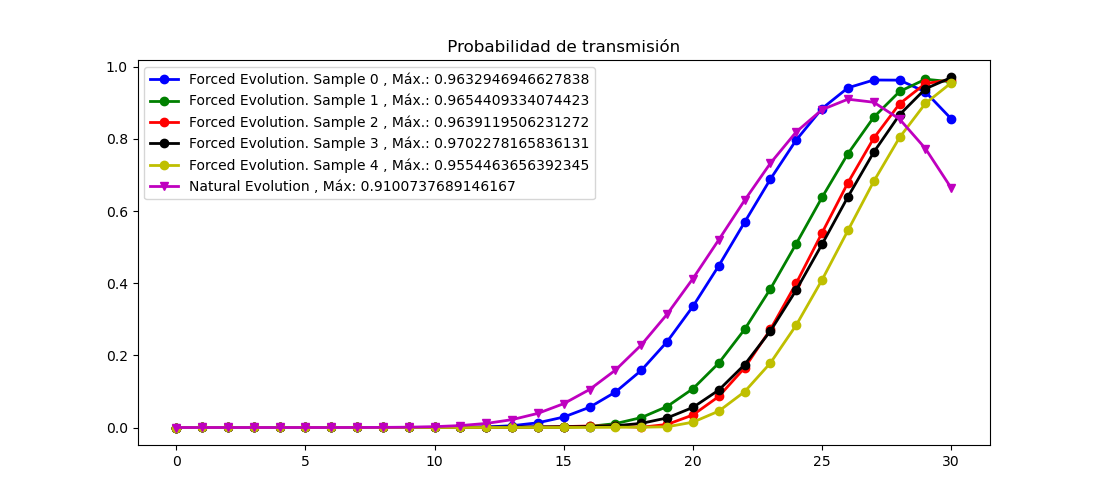

In [ ]:
directory = '/home/speron/dynga/dinamic_ga/n6_si'
n = 6
samples = np.arange(0,5,1)
compare_evolutions(directory,n,samples)

# N = 10

In [ ]:
b = 100
n = 10
dt = 0.15
# generar propagadores
actions = actions_paper(b, n)
propagators = gen_props(actions, n, b, dt)


n10_files = os.listdir('/home/speron/dynga/dinamic_ga/n10_stats/')

ga_actions = np.asarray([])

number_of_sequences = 0

for file in n10_files:
    if 'act_sequence' in file:
        actions = np.genfromtxt('/home/speron/dynga/dinamic_ga/n10_stats/' + file, dtype=int)
        ga_actions = np.append(ga_actions,actions)
        number_of_sequences += 1

np.shape(ga_actions)

Propagacion de autoestados: correcta


(25000,)

/home/speron/dynga/dinamic_ga/n10_si/gan10_si.ini
Propagacion de autoestados: correcta
[ 2  8 12 13 15  8  7  9  8 13 10  9 14  9 12  0 13  0  2 12 11  0  5  4
  4 13 13  5  0  5  5  3  4  5  5  2  1  6  2 15  7  5 14  2  3  6  1 12
 14  7]
[ 4  8  7 10  2  5  9  8 13 15  8 12 14 14 12  8 14  9  2  3  3 14 11 14
 14  4 11 13  9  7  3 13  6  2  1  0  1  1  7 15  2 14 14  3  4  0  1  8
 15 14]
[11 15 10 11  0  9  9 15  8 10  9 13  0 13  8  0  0 14  3 12 10  1 10  5
  2  0 11 11  5 13  1  7  2  7 11  6  1  7 15  2  7  4  4  7  8  2  3  1
  1 14]
[15 11  7 12  9 14 12  9  8 11 14 13 11 11  0 13  9  2  2 13 12 10 15  7
 13  1  4  3  5  7  6  7  5  1  6  0  6 14  1  6  5 14  4 14 13  6  1  7
  5 10]
[ 6  8 14 12 15 10 15 11 12 12 14 10 14  8 11 14 13 10  8  2 12  0 13 11
  9  2  7  2  0  7 11  3  1  6  0  1  1  2  1  0 14  7  0  4  1 14  5  3
 13 10]


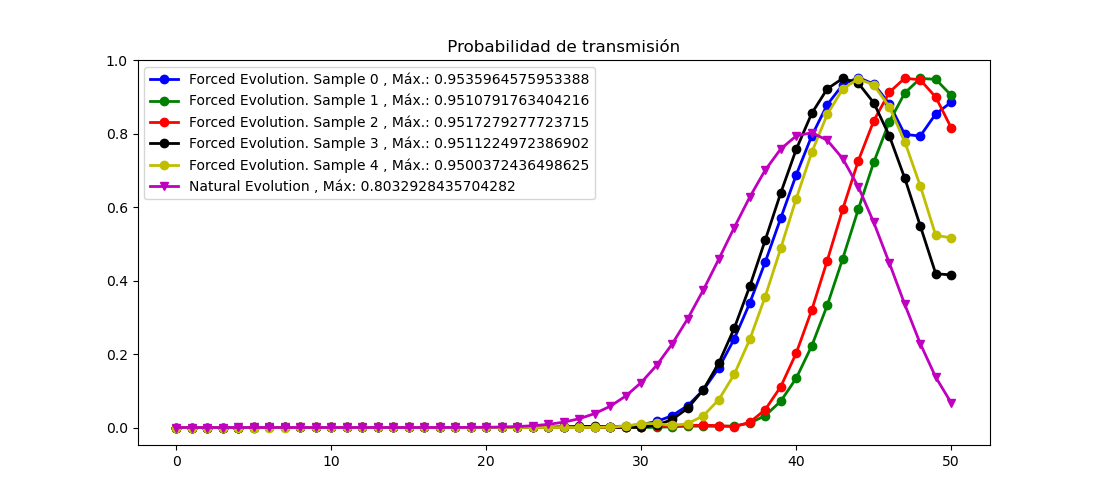

In [ ]:
directory = '/home/speron/dynga/dinamic_ga/n10_og'
n = 10
samples = np.arange(0,5,1)
compare_evolutions(directory,n,samples)

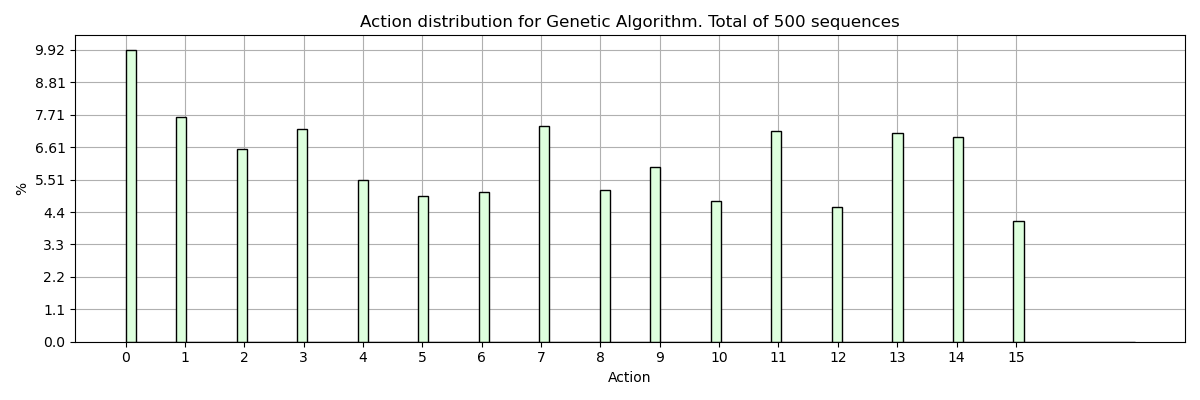

In [ ]:
population = ga_actions
nbins  =100
# --------------------------------------------------
# array of action distributions
#---------------------------------------------------
figure, ax = plt.subplots(figsize=(12, 4))


# plot histogram of fidelity distribution
hist, bins, c = ax.hist(
    population, bins=nbins, range=[0, 17], edgecolor="black", color="#DDFFDD"
)

# configure yticks to show percentage of total pop. number
max_value = int(np.max(hist))
y = np.linspace(int(0), max_value, 10, dtype=int)
ax.set_yticks(y)
y_ticks = np.around(y* 100 / np.shape(population),2)
ax.set_yticklabels(y_ticks)

x = np.arange(0, 16, 1)
ax.set_xticks(x)

# set grid, title and labels
plt.grid()
plt.title("Action distribution for Genetic Algorithm. Total of {} sequences".format(number_of_sequences))
ax.set_xlabel("Action")
ax.set_ylabel("%")
plt.tight_layout()

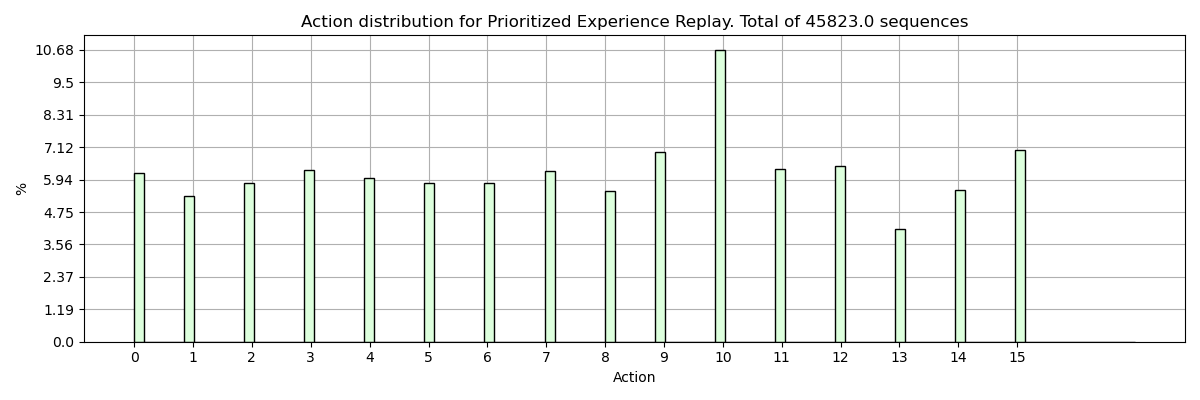

In [ ]:
population = np.genfromtxt('/home/speron/dynga/dinamic_ga/n10_stats/success_action_sequences_PER.dat')
population = population.flatten()
nbins  =100
# --------------------------------------------------
# array of action distributions
#---------------------------------------------------
figure, ax = plt.subplots(figsize=(12, 4))


# plot histogram of fidelity distribution
hist, bins, c = ax.hist(
    population, bins=nbins, range=[0, 17], edgecolor="black", color="#DDFFDD"
)

# configure yticks to show percentage of total pop. number
max_value = int(np.max(hist))
y = np.linspace(int(0), max_value, 10, dtype=int)
ax.set_yticks(y)
y_ticks = np.around(y* 100 / np.shape(population),2)
ax.set_yticklabels(y_ticks)

x = np.arange(0, 16, 1)
ax.set_xticks(x)

# set grid, title and labels
plt.grid()
plt.title("Action distribution for Prioritized Experience Replay. Total of {} sequences".format(population.shape[0]/50))
ax.set_xlabel("Action")
ax.set_ylabel("%")
plt.tight_layout()

Propagacion de autoestados: correcta
(24225, 50)


Text(0.5, 1.0, ' Probabilidad de transmisión ')

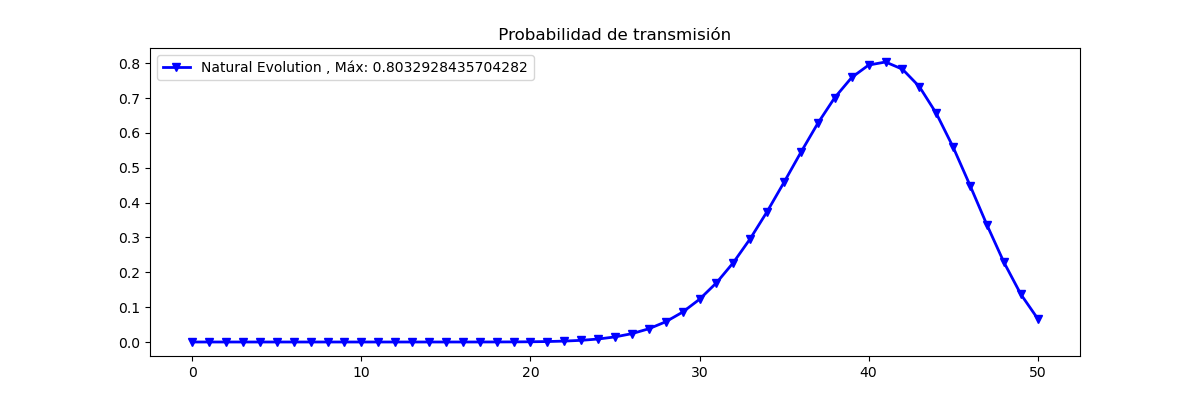

In [ ]:
figure, ax = plt.subplots(figsize=(12, 4))

# system parameters
nh = 8
dt = 0.15
b = 100
t_steps = 51

# generar propagadores
actions = actions_paper2(b, nh)
propagators = gen_props(actions, nh, b, dt)
times = np.arange(0,t_steps,1)

# definicion del estado inicial e inicializacion de estados forzado y natural

initial_state = np.zeros(nh, dtype=np.complex_)
initial_state[0] = 1.0

free_state = initial_state

population = np.genfromtxt('/home/speron/dynga/dinamic_ga/n10_stats/success_action_sequences.dat',dtype=int)
print(np.shape(population))

for i in np.arange(0,1000,1):

    action_sequence = population[i,:]
    forced_state = initial_state
    forced_evol = [state_fidelity(forced_state)]


    for action in action_sequence:
        
        forced_state = calculate_next_state(forced_state,action,propagators)
        forced_evol.append(state_fidelity(forced_state))

    max_forced = np.max(forced_evol)
    if max_forced >= 0.95:
        plt.plot(times,forced_evol,'-o', label = 'Forced Evolution. Sample {} , Máx.: {}'.format(i,max_forced))

natural_evol = [state_fidelity(free_state)]

for action in action_sequence:
        
    free_state = calculate_next_state(free_state,0,propagators)
    natural_evol.append(state_fidelity(free_state))

max_natural = np.max(natural_evol)

plt.plot(times,natural_evol, '-v', label = 'Natural Evolution , Máx: {}'.format(max_natural))
plt.legend(loc='upper left')

plt.title(' Probabilidad de transmisión ')

Propagacion de autoestados: correcta
Propagacion de autoestados: correcta


Text(0.5, 1.0, ' Probabilidad de transmisión ')

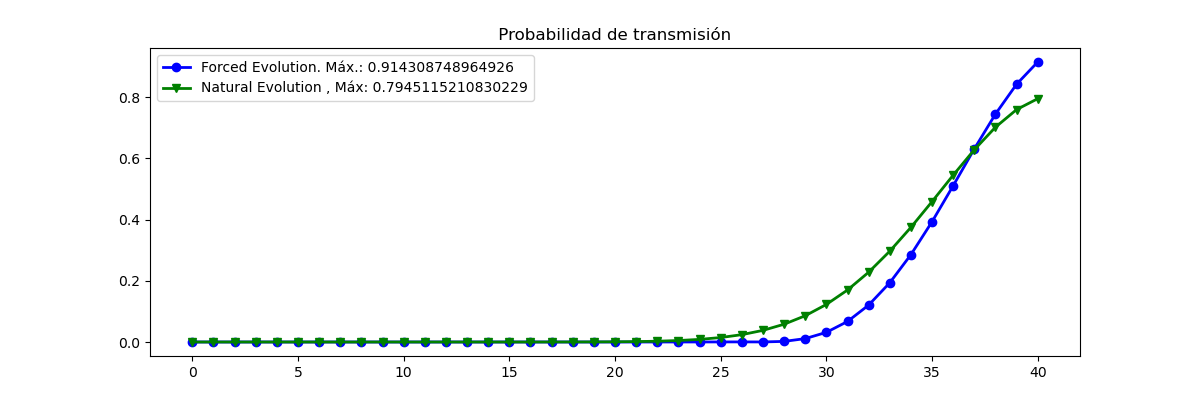

In [ ]:
figure, ax = plt.subplots(figsize=(12, 4))

# system parameters
nh = 10
dt = 0.15
b = 100
t_steps = nh*4+1

# generar propagadores
actions = new_actions(b, nh)
propagators = gen_props(actions, nh, b, dt)
times = np.arange(0,t_steps,1)

# definicion del estado inicial e inicializacion de estados forzado y natural

initial_state = np.zeros(nh, dtype=np.complex_)
initial_state[0] = 1.0

free_state = initial_state
forced_state = initial_state
action_sequence =  [ 0, 12,  0, 15,  0,  9 ,15, 15,  0, 15, 15,  0, 15,  3, 10,  3, 10,  3, 12,  2, 12,  9,  0 ,11, 7, 13, 13,  1, 15,  5,  0,  0,  5,  5,  0,  2,  2,  2,  0,  2]
forced_evol = [state_fidelity(forced_state)]



for action in action_sequence:
    
    forced_state = calculate_next_state(forced_state,action,propagators)
    forced_evol.append(state_fidelity(forced_state))

max_forced = np.max(forced_evol)

plt.plot(times,forced_evol,'-o', label = 'Forced Evolution. Máx.: {}'.format(max_forced))

actions = actions_paper2(b, nh)
propagators = gen_props(actions, nh, b, dt)

natural_evol = [state_fidelity(free_state)]

for action in action_sequence:
        
    free_state = calculate_next_state(free_state,0,propagators)
    natural_evol.append(state_fidelity(free_state))

max_natural = np.max(natural_evol)

plt.plot(times,natural_evol, '-v', label = 'Natural Evolution , Máx: {}'.format(max_natural))
plt.legend(loc='upper left')

plt.title(' Probabilidad de transmisión ')